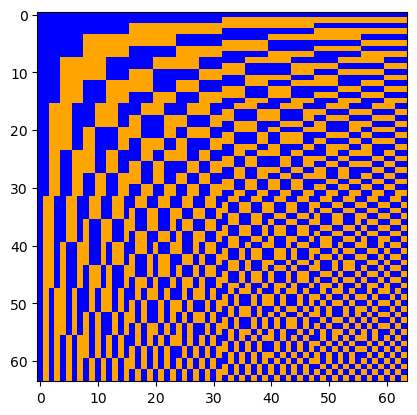

In [1]:
from scipy.linalg import hadamard
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def hadamard_sorter(n):
    # Создаём основную матрицу Адамара размером n x n
    main_mtrx = hadamard(n).tolist()
    pos = []

    # Вычисляем количество изменений в строках матрицы и сохраняем это вместе с индексом строки
    for i in range(n): 
        pos.append([i, sum(1 for q in range(n - 1) if main_mtrx[i][q] != main_mtrx[i][q + 1])])

    # Сортируем индексы строк по количеству изменений
    pos = sorted(pos, key=lambda x: x[1])
    pos = [i[0] for i in pos]

    # Создаём результирующую матрицу, начиная с первой строки отсортированной матрицы
    rslt = np.array([main_mtrx[pos[0]]])
    
    # Добавляем остальные строки в результирующую матрицу
    for i in range(1, n):
        rslt = np.vstack((rslt, main_mtrx[pos[i]]))

    return rslt

# Создаём матрицу Адамара с сортировкой
data = hadamard_sorter(2**6)

# Определяем цветовую карту
cmap = ListedColormap(['orange', 'blue'])

# Отображаем матрицу с цветовой картой
plt.imshow(data, cmap=cmap)
plt.show()
